In [2]:
import json
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import math
import scipy as sp
import matplotlib
import warnings
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names

pos_ret_raw = pd.concat(map(pd.read_csv, ['./csvs02/returns_both/pos/' + file for file in os.listdir('./csvs02/returns_both/pos')])).sort_values(by=['t'])
neg_ret_raw = pd.concat(map(pd.read_csv, ['./csvs02/returns_both/neg/' + file for file in os.listdir('./csvs02/returns_both/neg')])).sort_values(by=['t'])
ret_raw = pos_ret_raw.append(neg_ret_raw).sort_values(by=['t'])
pos_log = np.log(pos_ret_raw['ret']/pos_ret_raw['ret'].shift(1)).dropna()
neg_log = np.log(neg_ret_raw['ret']/neg_ret_raw['ret'].shift(1)).dropna()
ret_log = np.log(np.abs(ret_raw['ret']/ret_raw['ret'].shift(1))).dropna()


markets = ret_raw['m'].unique()

DataFrameDict = {elem : pd.DataFrame() for elem in markets}
for key in DataFrameDict.keys():
    DataFrameDict[key] = ret_raw[ret_raw['m'] == key].copy()

for key, df in DataFrameDict.items():
    df = df.reset_index()

def abs_sq(ret):
    abs_ret = np.abs(ret - ret.shift(1)).dropna()
    sq_ret = np.square(ret - ret.shift(1)).dropna()
    simple_ret = ((ret - ret.shift(1))/ret.shift(1)).dropna()
    log_ret = np.log(np.abs(ret/ret.shift(1))).dropna()
    return abs_ret, sq_ret, simple_ret, log_ret

DataFrameDictSq = dict.fromkeys(markets)
DataFrameDictAbs = dict.fromkeys(markets)
DataFrameDictSimple = dict.fromkeys(markets)
DataFrameDictLog = dict.fromkeys(markets)
for key, df in DataFrameDict.items():
    DataFrameDictAbs[key], DataFrameDictSq[key],DataFrameDictSimple[key], DataFrameDictLog[key] = abs_sq(df['ret'])

#### Stationarity
we can split our dataset and calculate the mean and variance for each group.

In [7]:
from statsmodels.tsa.stattools import adfuller

def print_adf(series):
    tf = False
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))
    if result[0] < result[3] and result[1] < 0.05:
       tf =  True
    return tf

In [8]:
adf_results = []
for key, elem in DataFrameDictLog.items():
    print(key)
    adf_results.append(print_adf(elem))
print(adf_results)

1.122862121
ADF Statistic: -18.555971
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
1.122862126
ADF Statistic: -13.418640
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
1.122862141
ADF Statistic: -13.809808
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
1.122862131
ADF Statistic: -10.988153
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
1.122862151
ADF Statistic: -6.783710
p-value: 0.000000
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578
1.122862136
ADF Statistic: -11.522417
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
1.122862146
ADF Statistic: -12.320027
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
1.122930925
ADF Statistic: -16.101875
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
1.12293091
ADF Statistic: -17.525534
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
1.1229308999

In [10]:
adf_results.count(False)

0

In [12]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    tf = False
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
    

for key, elem in DataFrameDictLog.items():
    print(key)
    kpss_test(elem)

1.122946937
KPSS Statistic: 0.014011842285375166
p-value: 0.1
num lags: 38
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
1.122946927
KPSS Statistic: 0.05310078800738425
p-value: 0.1
num lags: 232
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
1.122946942
KPSS Statistic: 0.04961413512279822
p-value: 0.1
num lags: 59
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
1.122946932
KPSS Statistic: 0.03036727363998263
p-value: 0.1
num lags: 69
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
1.122946947
KPSS Statistic: 0.16077108277458824
p-value: 0.1
num lags: 232
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
1.122946957
KPSS Statistic: 0.046434047012835225
p-value: 0.1
num lags: 26
Critial Valu

/home/karolina/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/karolina/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/karolina/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/karolina/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
lo

#### Autocorrelation:
The acf() function expects values to be in order by time and assumes equal spacing in time. 
How many lags?

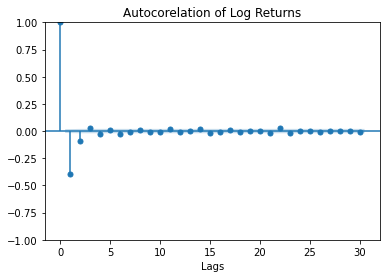

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(x=ret_log, lags=30)
plt.xlabel("Lags")
plt.title("Autocorelation of Log Returns")
plt.show()


1.122862121


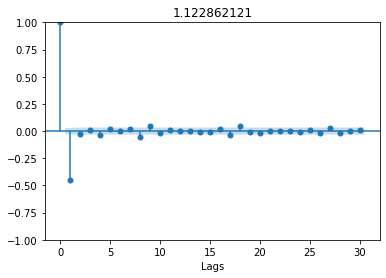

1.122862126


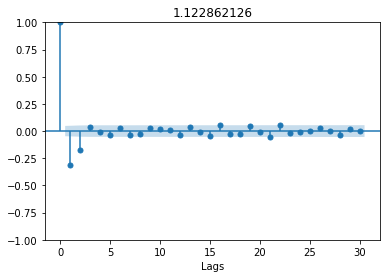

1.122862141


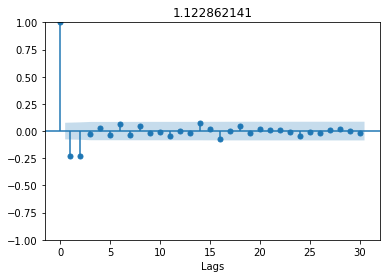

1.122862131


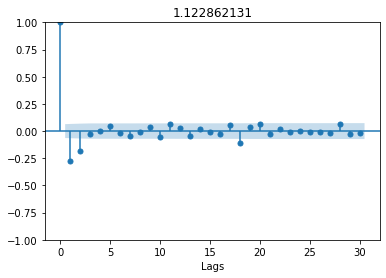

1.122862151


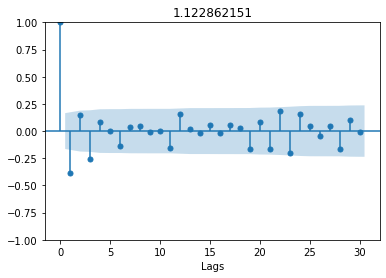

1.122862136


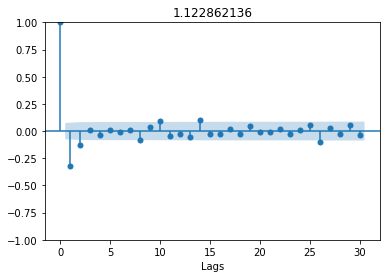

1.122862146


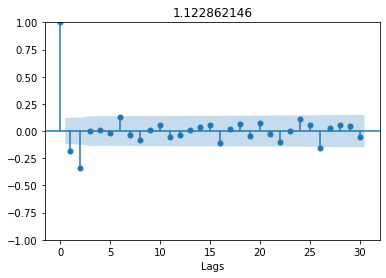

1.122930925


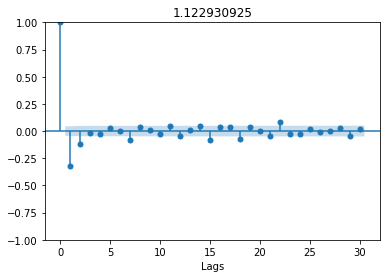

1.12293091


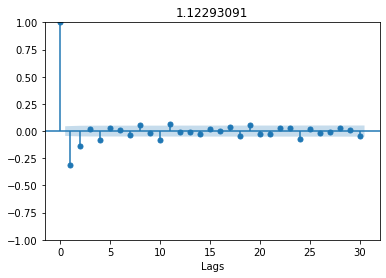

1.1229308999999998


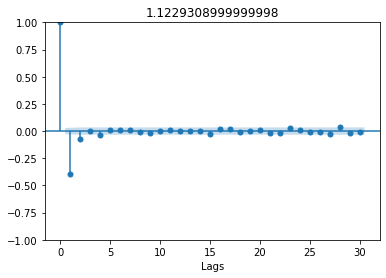

1.122930915


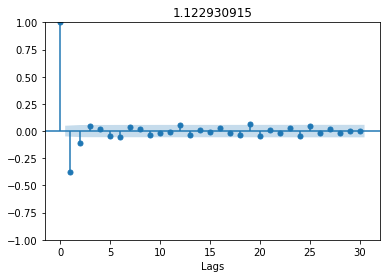

1.12293092


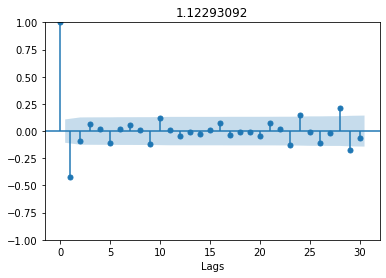

1.122930905


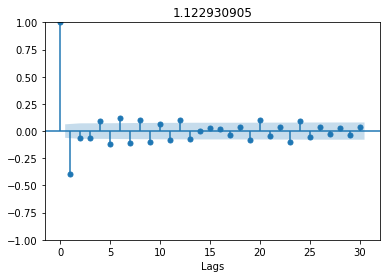

1.12293093


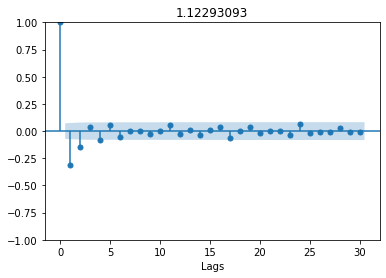

1.122930935


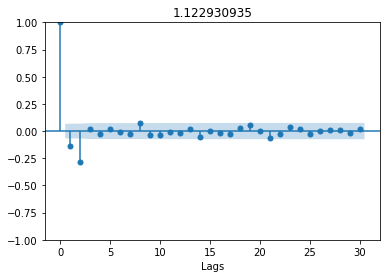

1.122946937


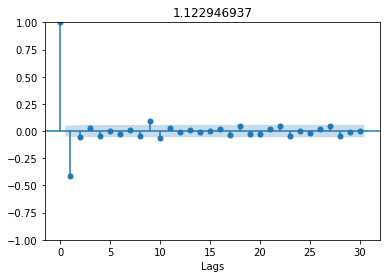

1.122946927


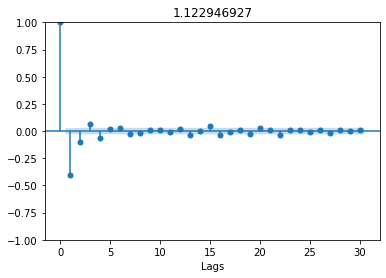

1.122946942


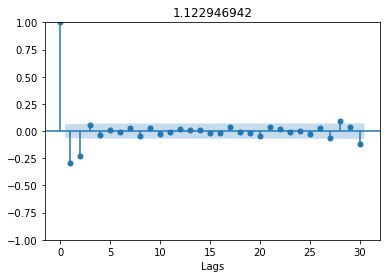

1.122946932


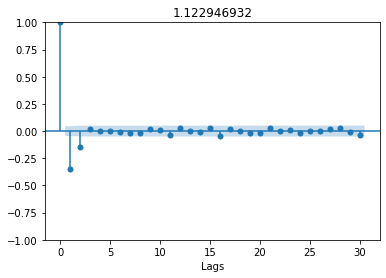

1.122946947


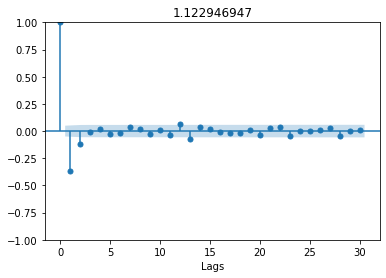

1.122946957


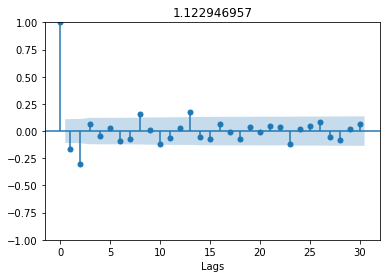

1.122946952


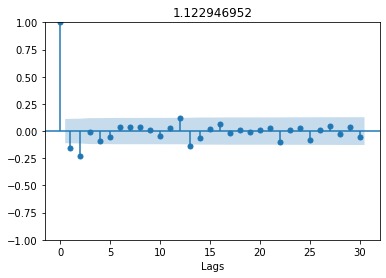

1.12303993


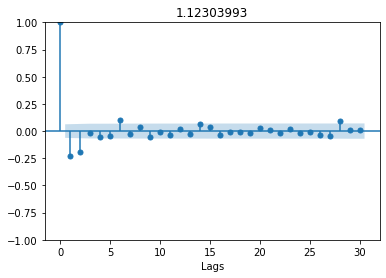

1.12303992


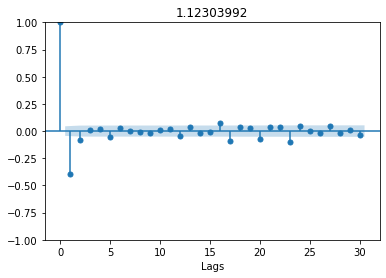

1.123039905


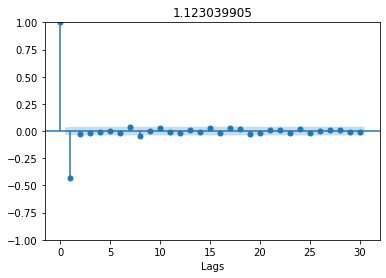

1.123039925


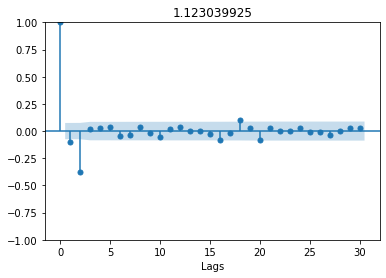

1.123039915


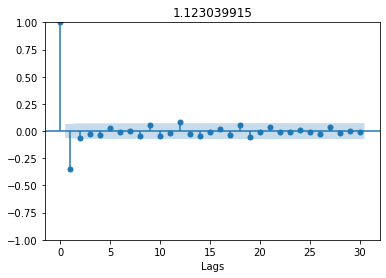

1.1230399


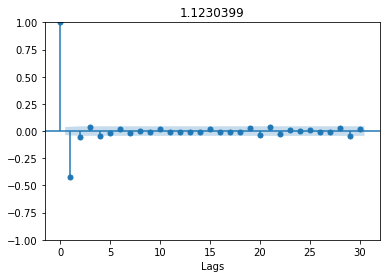

1.12303991


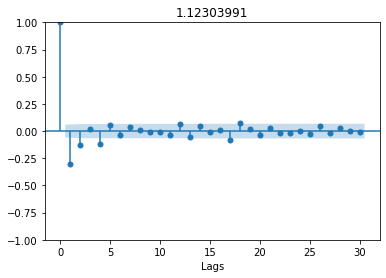

1.12307244


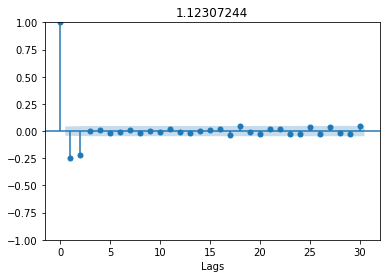

1.123072425


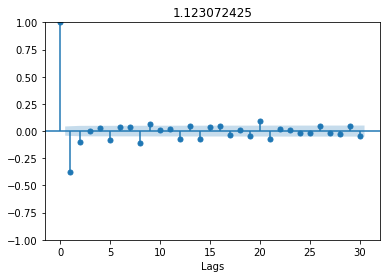

1.12307245


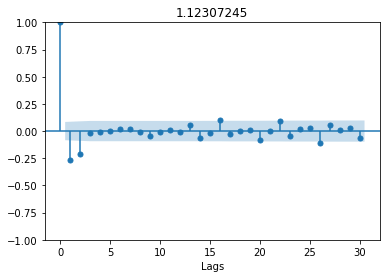

1.12307243


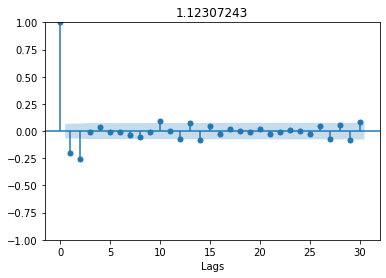

1.123072445


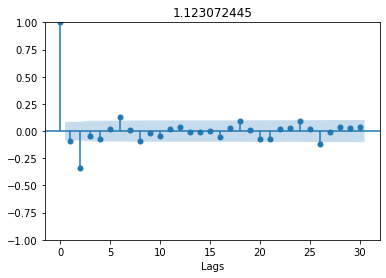

1.123072435


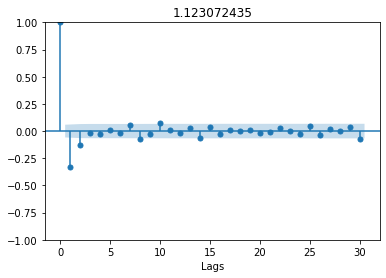

1.12307242


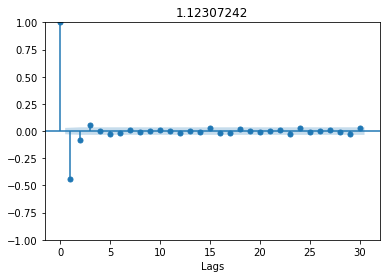

1.123110083


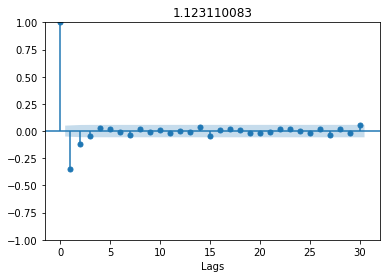

1.123110088


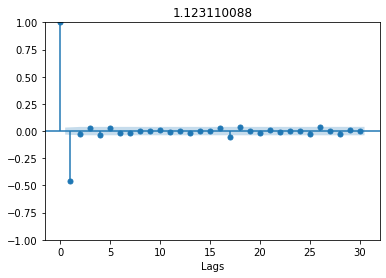

1.123110093


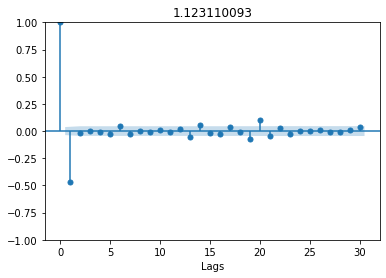

1.123110098


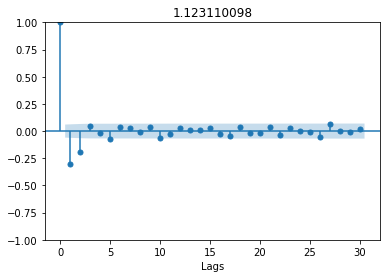

1.123110113


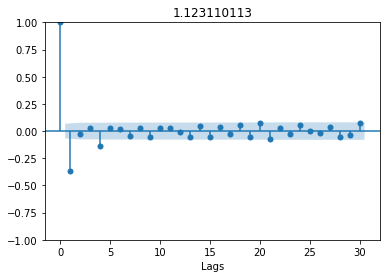

1.123110103


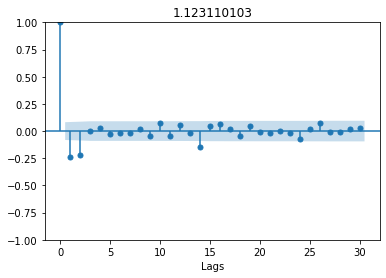

1.123110108


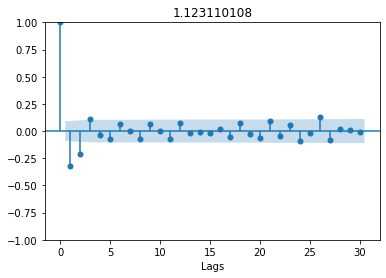

1.123124735


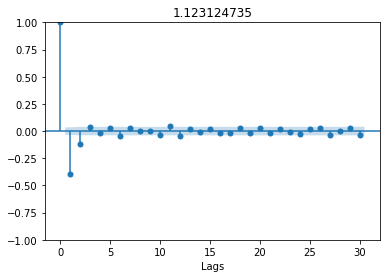

1.12312474


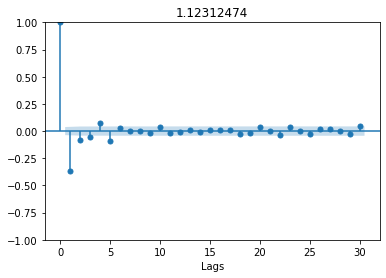

1.123124765


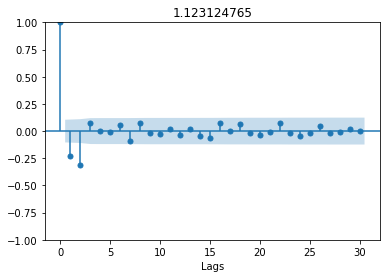

1.123124755


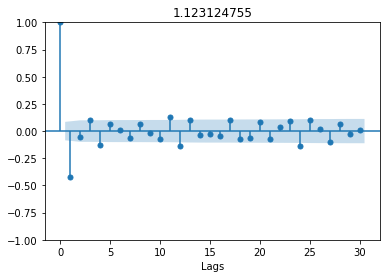

1.12312476


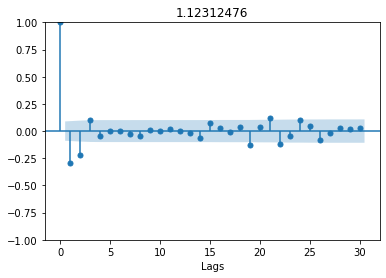

1.123124745


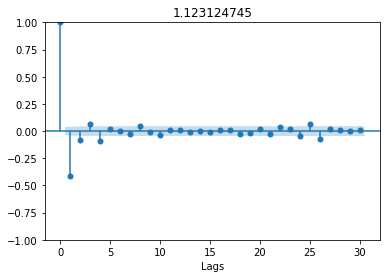

1.12312475


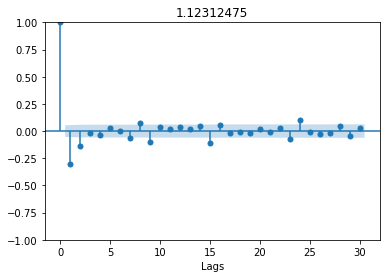

1.123199406


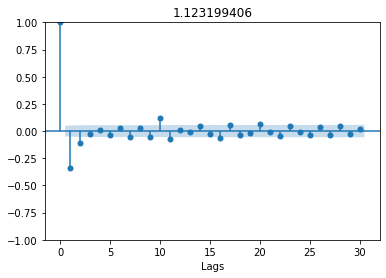

1.123199391


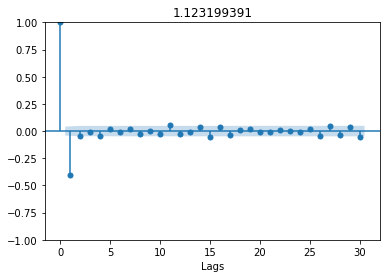

1.123199386


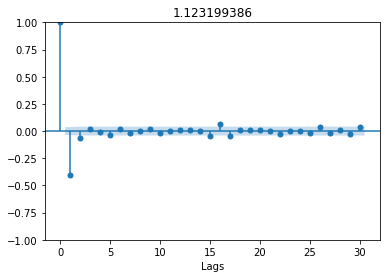

1.123199401


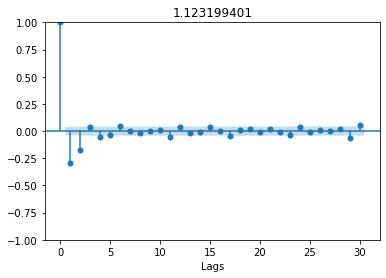

1.123199396


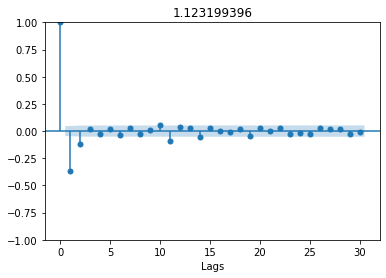

1.1231994159999998


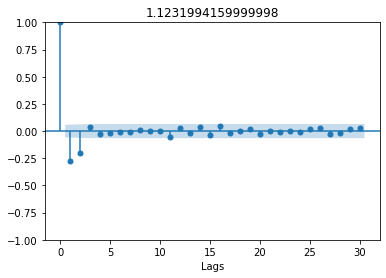

1.123199411


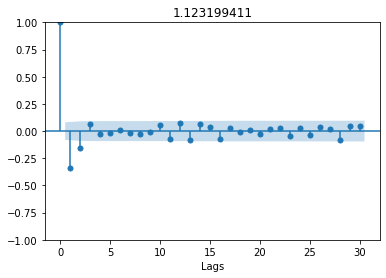

1.123253137


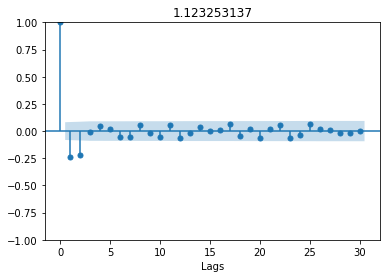

1.123253122


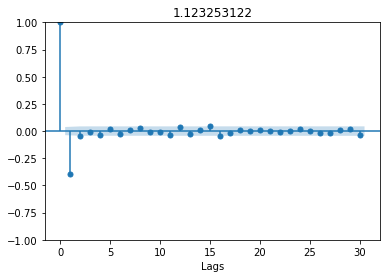

1.123253127


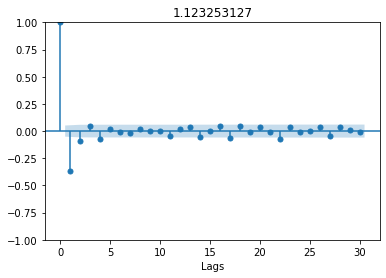

1.123253142


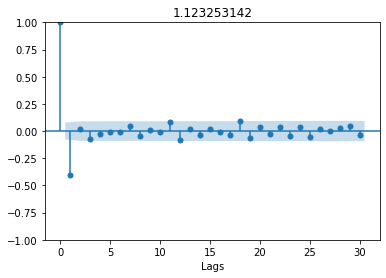

1.123253132


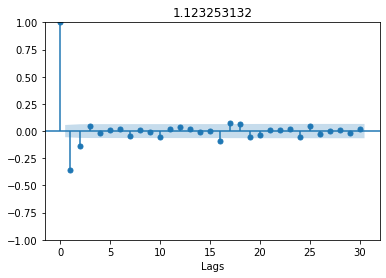

1.123253117


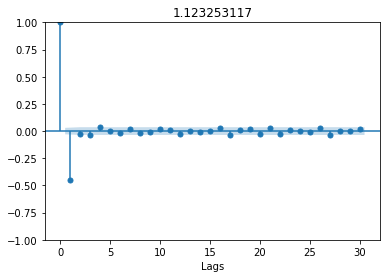

1.123253147


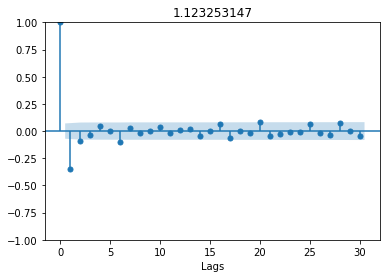

1.123288678


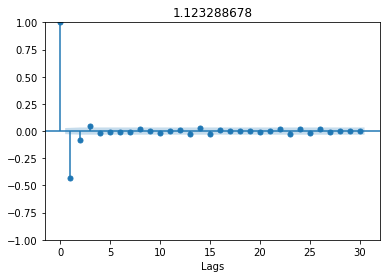

1.123288683


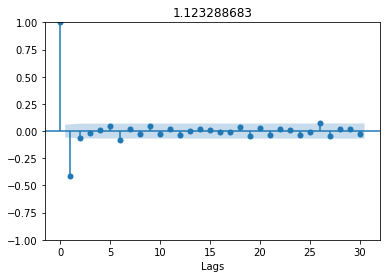

1.123288688


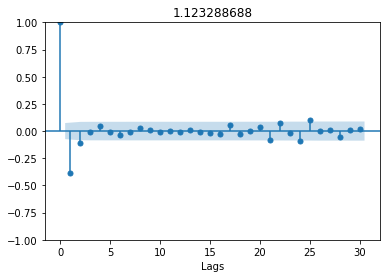

1.123288703


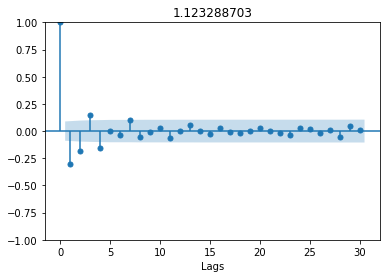

1.123288693


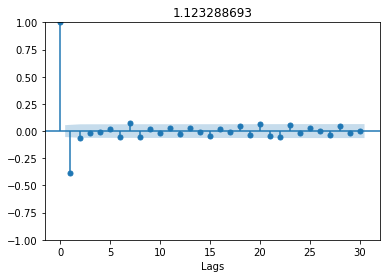

1.123288708


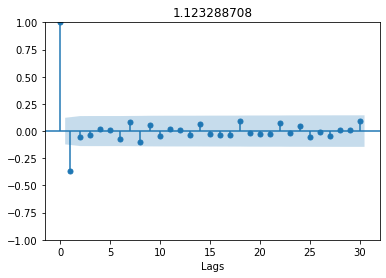

1.123288698


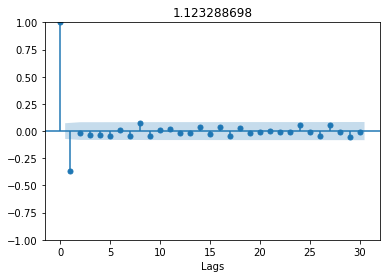

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def acf(data, lags_n, title):
    plot_acf(x=data, lags=lags_n, use_vlines = True)
    plt.xlabel("Lags")
    plt.title(title)
    plt.show()


for key, elem in DataFrameDictLog.items():
    print(key)
    acf(elem, 30, str(key))


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.57368263 -0.50870242]



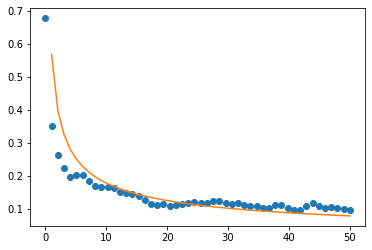

1.122862121


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.4524188  -0.37802664]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


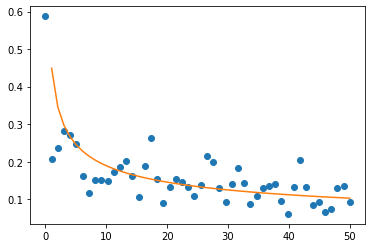

1.122862126
[ 0.63603888 -0.42779897]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


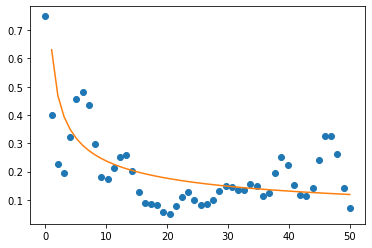

1.122862141
[ 0.43113921 -0.41257642]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


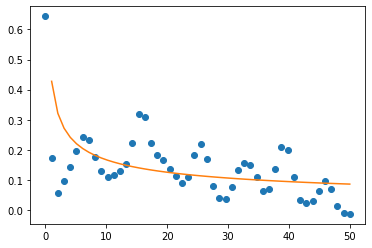

1.122862131
[ 0.4580587 -0.551996 ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


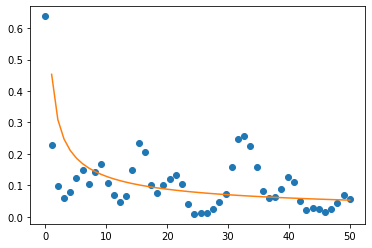

1.122862151
[ 0.90586996 -0.893923  ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


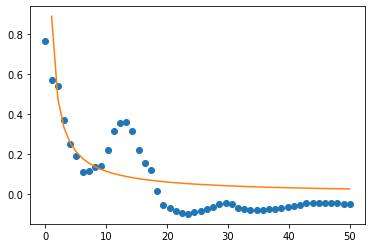

1.122862136
[ 0.53385008 -0.17709983]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


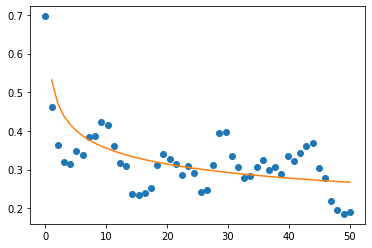

1.122862146
[ 0.5131886 -0.686025 ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


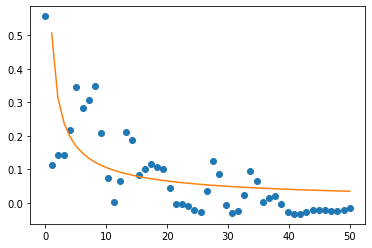

1.122930925


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.66623163 -0.52282968]



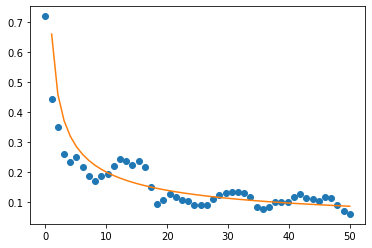

1.12293091
[ 0.52528651 -0.4962776 ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


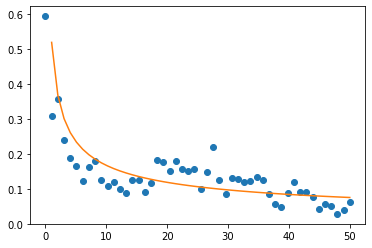

1.1229308999999998
[ 0.55746382 -0.68903857]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


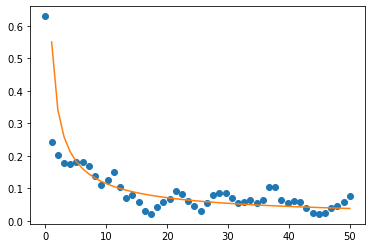

1.122930915
[ 0.69928433 -0.5322879 ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


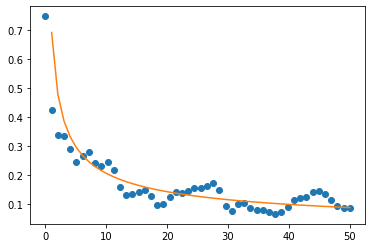

1.12293092
[ 0.53244844 -0.76755683]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


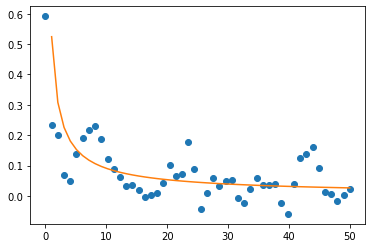

1.122930905
[ 0.617686   -0.65796731]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


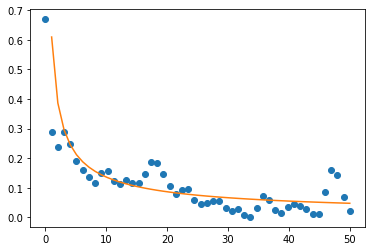

1.12293093
[ 0.61331654 -0.85308982]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


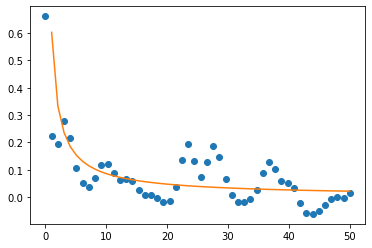

1.122930935
[ 0.56662829 -0.71889232]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


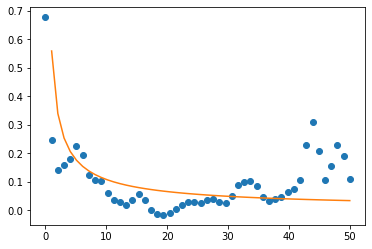

1.122946937
[ 0.56548497 -0.64659588]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


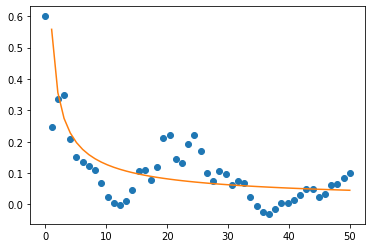

1.122946927
[ 0.47206043 -0.5505371 ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


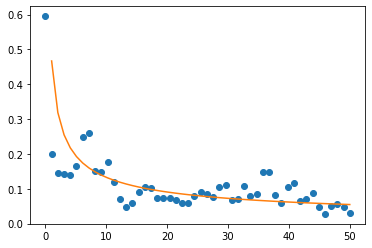

1.122946942
[ 0.62876501 -1.08408734]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


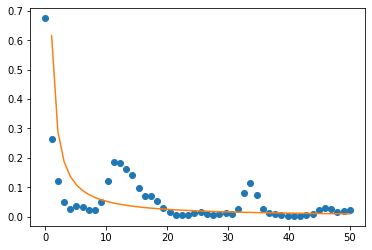

1.122946932
[ 0.60217044 -0.64205148]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


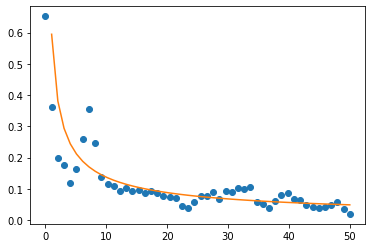

1.122946947


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.54007122 -0.46448006]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


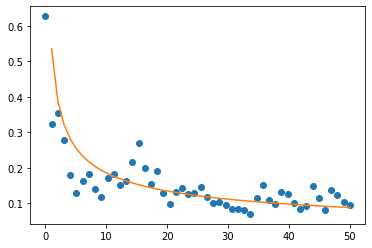

1.122946957
[ 0.66971376 -0.61593575]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


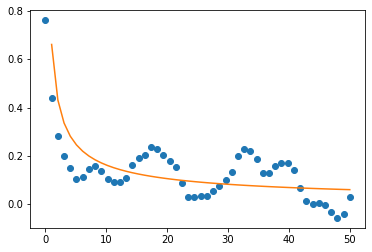

1.122946952
[ 0.74198435 -0.44851374]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


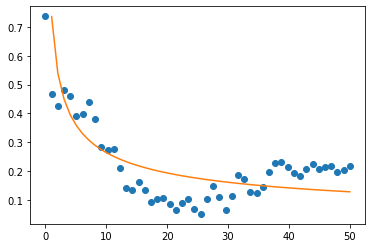

1.12303993


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.66802836 -0.715751  ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


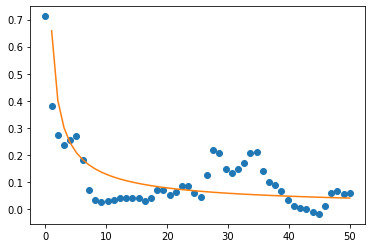

1.12303992
[ 0.47220489 -0.25367374]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


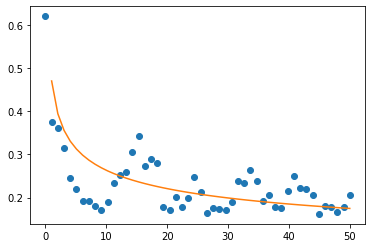

1.123039905
[ 0.5672082  -0.53774888]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


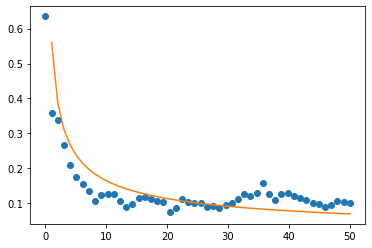

1.123039925
[ 0.78234368 -0.49455315]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


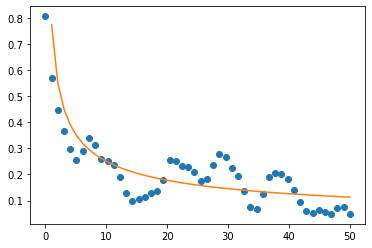

1.123039915
[ 0.55904013 -0.42372277]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


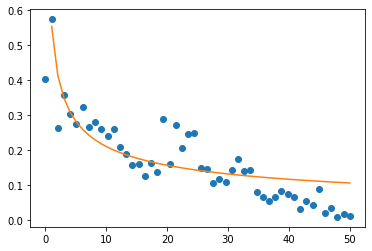

1.1230399


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.7116559  -0.58907615]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


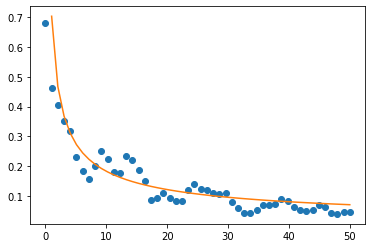

1.12303991
[ 0.52881467 -0.39188409]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


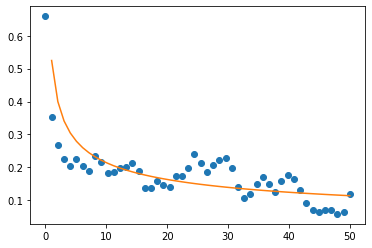

1.12307244


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.6260172  -1.08672372]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


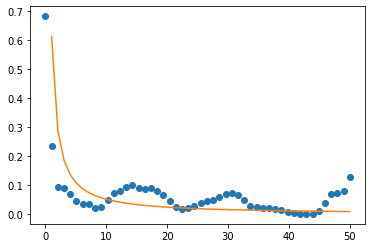

1.123072425


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.60332467 -0.77020339]



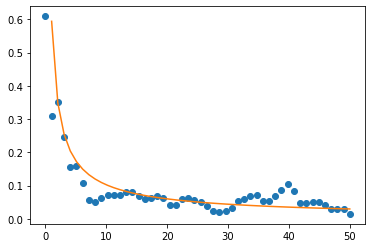

1.12307245


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.56658428 -0.65963287]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


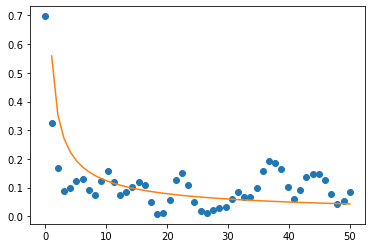

1.12307243
[ 0.47982764 -0.16446207]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


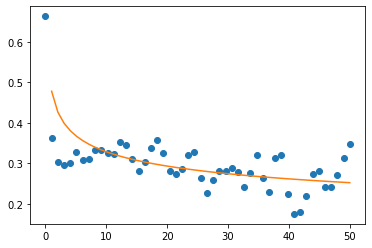

1.123072445
[ 0.80322544 -0.72818175]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


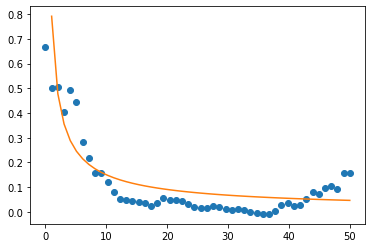

1.123072435
[ 0.63016447 -0.65812342]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


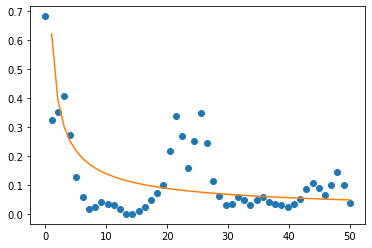

1.12307242


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.47443833 -0.59946722]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


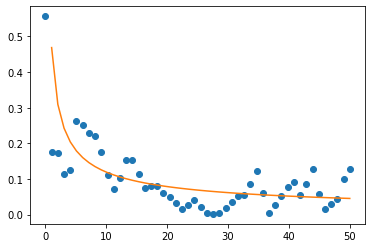

1.123110083
[ 0.5216828  -1.97548291]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


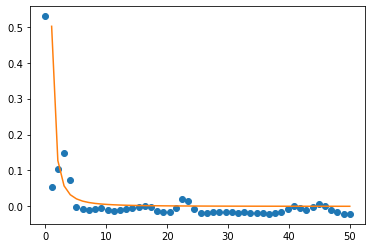

1.123110088


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.51159282 -0.76861546]



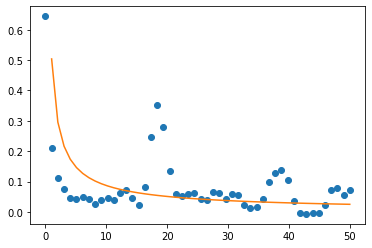

1.123110093


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.59261135 -0.51425762]



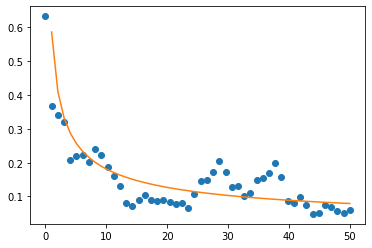

1.123110098
[ 0.53728201 -0.64635575]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


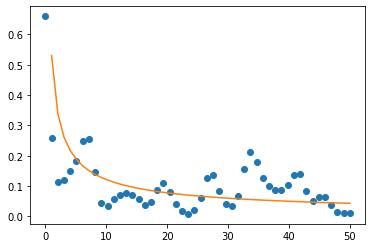

1.123110113
[ 0.50954796 -0.41535656]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


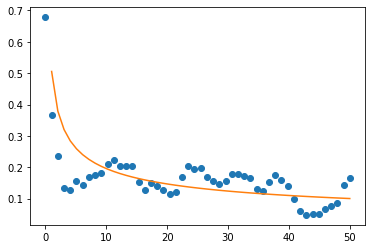

1.123110103
[ 0.52588641 -0.58599388]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


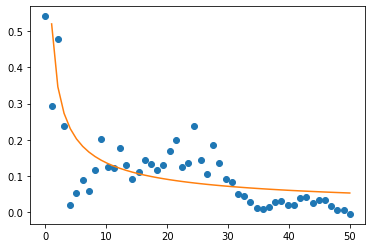

1.123110108
[ 0.43398058 -0.35134162]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


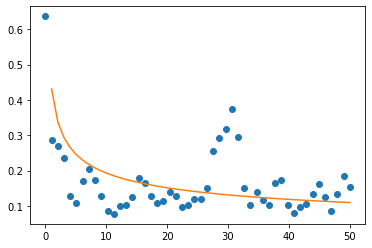

1.123124735


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.57795872 -0.63004651]



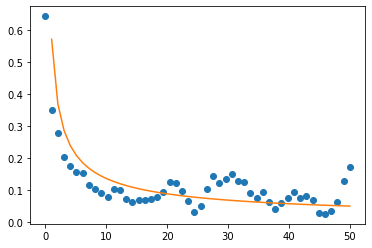

1.12312474
[ 0.71234516 -0.94296749]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


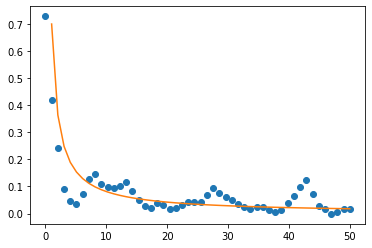

1.123124765
[ 0.82255262 -0.43657706]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


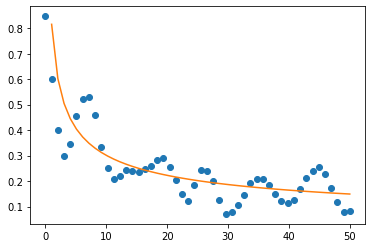

1.123124755
[ 0.73539608 -0.53782914]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


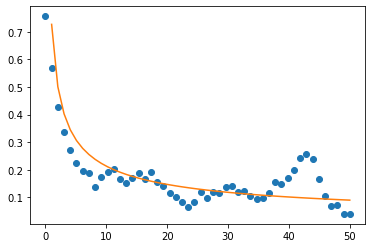

1.12312476
[ 0.49730302 -0.23833651]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


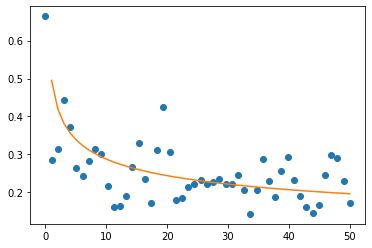

1.123124745
[ 0.58470333 -0.45857347]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


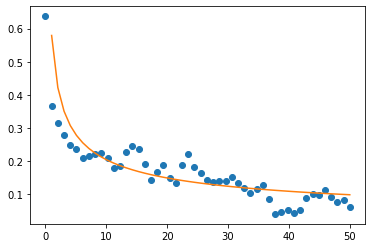

1.12312475


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.61105034 -0.46167754]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


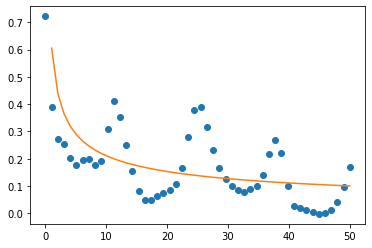

1.123199406
[ 0.76095714 -0.4272014 ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


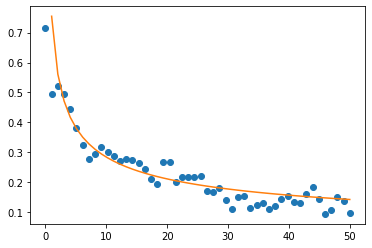

1.123199391


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.59031401 -0.42966315]



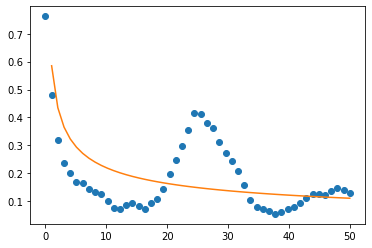

1.123199386


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.38608439 -0.51605785]



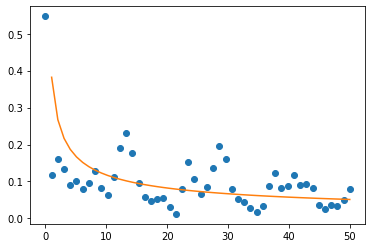

1.123199401
[ 0.52293869 -0.42425011]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


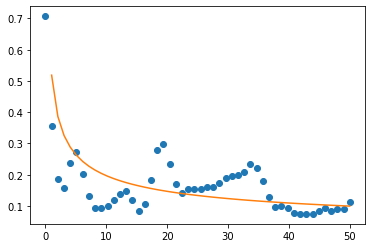

1.123199396


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.63822085 -0.66902644]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


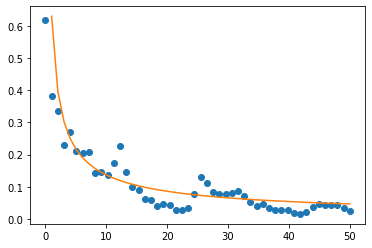

1.1231994159999998
[ 0.50722561 -0.37570152]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


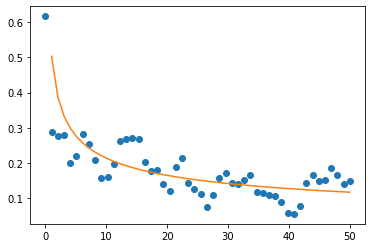

1.123199411
[ 0.86778207 -1.16159898]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


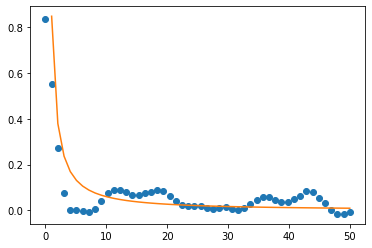

1.123253137
[ 0.58057606 -0.44475601]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


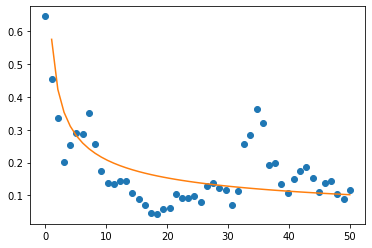

1.123253122
[ 0.54952453 -0.35460881]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


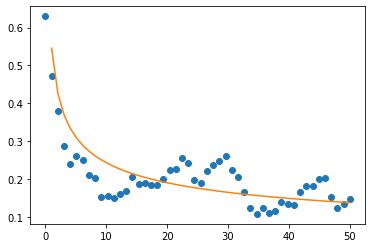

1.123253127


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.61089291 -0.91540069]



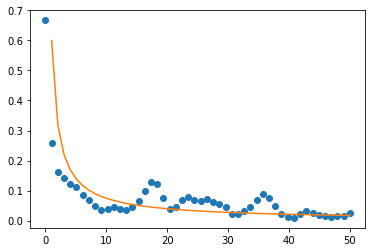

1.123253142
[ 0.75388513 -0.55161845]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


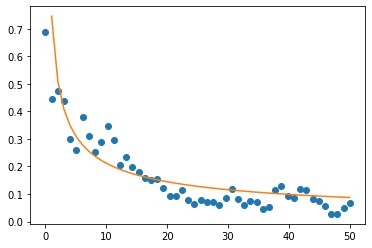

1.123253132


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.42061971 -0.55652566]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


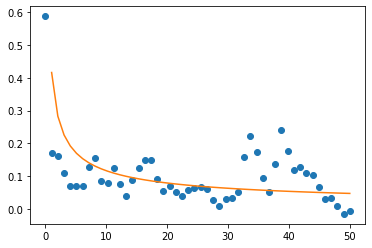

1.123253117


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.41257193 -0.6660652 ]



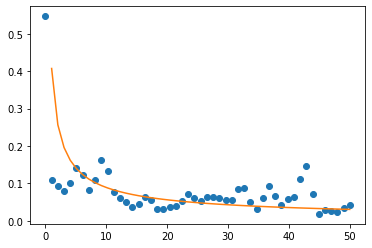

1.123253147
[ 0.70767463 -0.50486547]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


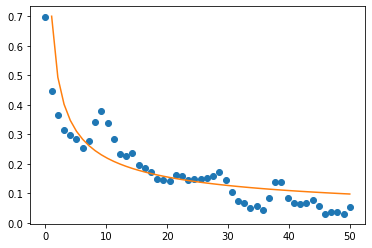

1.123288678


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.67383692 -0.94197479]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


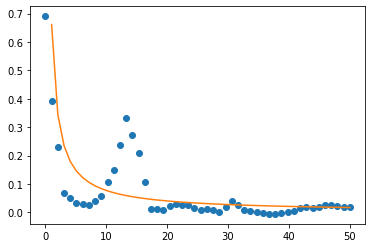

1.123288683


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.61504466 -0.54214654]



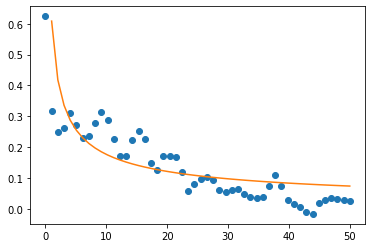

1.123288688


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.73602379 -0.93071835]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


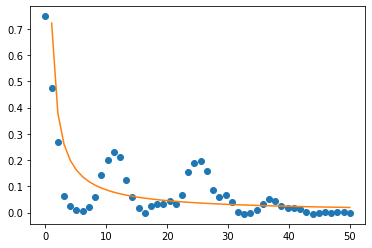

1.123288703


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.53152948 -0.5958426 ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


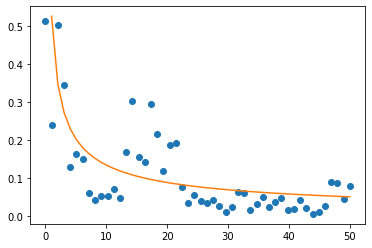

1.123288693


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.67301346 -0.36017946]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


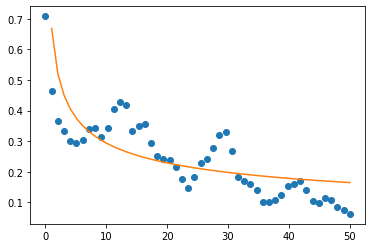

1.123288708
[ 0.68466112 -1.94929962]


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


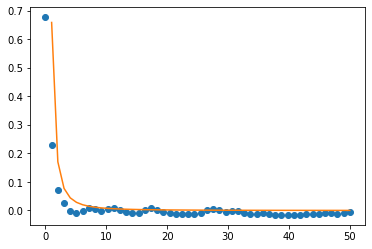

1.123288698


<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.64839068 -0.7552773 ]



<ipython-input-11-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


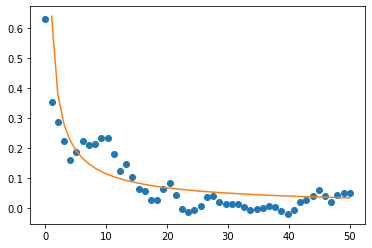

[-0.3780266382899361, -0.4277989669683352, -0.4125764152998174, -0.551996001377279, -0.8939230042130032, -0.1770998336029113, -0.6860250019754645, -0.5228296845271354, -0.4962775953136716, -0.6890385670623714, -0.5322878968312242, -0.7675568283926221, -0.6579673089816782, -0.8530898183163541, -0.7188923200817026, -0.6465958753615408, -0.5505371003000824, -1.084087341437488, -0.6420514770067921, -0.4644800557037399, -0.6159357493503568, -0.4485137370984617, -0.7157509968614355, -0.2536737357240149, -0.5377488794227279, -0.49455315322440213, -0.4237227705846453, -0.5890761522127812, -0.3918840890455349, -1.0867237240102747, -0.7702033854031862, -0.659632870137755, -0.16446207243380342, -0.7281817476193634, -0.6581234242217636, -0.599467217908736, -1.9754829066671529, -0.7686154554336592, -0.5142576214767764, -0.6463557536885164, -0.41535656017654315, -0.5859938780526854, -0.351341623911183, -0.6300465094550106, -0.9429674927698548, -0.43657706218196424, -0.5378291392567779, -0.2383365062

In [11]:
from statsmodels.tsa import stattools

def autocorr_stats(data, lags):
    data.corr(data.shift(1), method = 'pearson')

    autocorr = stattools.acf(data, nlags= lags)

    # Get autocorrelation coefficient at lag = 1
    autocorr_coeff = autocorr[1]
    # print("Acf:" + str(autocorr))

    pautocorr = stattools.pacf(data, nlags= lags)
    pautocorr_coeff = pautocorr[1]
    # print("Pacf:" + str(pautocorr))
    
    return autocorr, pautocorr


from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a*np.power(x, b)

def fit_autocorr_func(data, lags, func):
    pars, cov = curve_fit(f=func, xdata=np.linspace(1, lags, data.size), ydata=data, p0=[0, 0], bounds=(-np.inf, np.inf))# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))# Calculate the residuals
    res = data - func(np.linspace(0, lags, data.size), *pars)
    print(str(pars) + '\n')
    plt.plot(np.linspace(0, lags, data.size), data, 'o', label='Data')
    plt.plot(np.linspace(0, lags, data.size), func(np.linspace(0, lags, data.size), *pars), '-', label='Fit')
    plt.show()
    return pars[1]

lags = 50
abs_ret, sq_ret, simple_ret, log_ret = abs_sq(ret_raw['ret'])
autocorr_t, pautocorr_t = autocorr_stats(abs_ret, lags)
fit_autocorr_func(autocorr_t[1:], lags, power_law)

beta = []

for key, elem in DataFrameDictAbs.items():
    print(key)
    autocorr_l, pautocorr_l = autocorr_stats(elem, lags)
    beta.append(fit_autocorr_func(autocorr_l[1:], lags, power_law))
print(beta)


<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[ 0.46299949 -1.13972522]



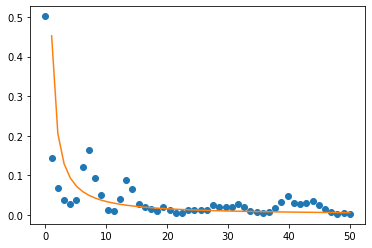

1.122946937
[ 0.38648617 -0.95241345]



<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


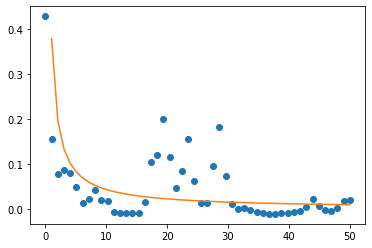

1.122946927
[ 0.39202066 -1.07271264]



<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


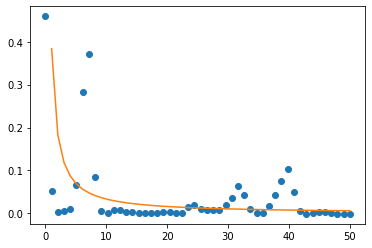

1.122946942
[ 0.49081569 -2.83227406]



<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


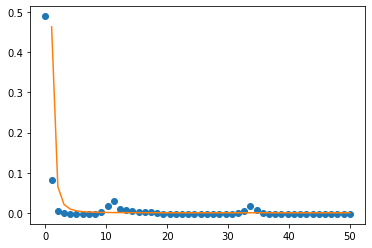

1.122946932
[ 0.53275702 -1.15735634]



<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


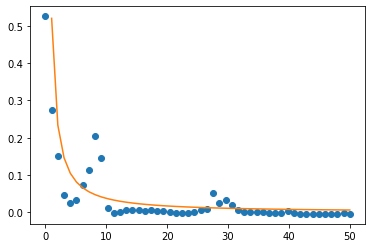

1.122946947
[ 0.48895971 -1.0967354 ]



<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


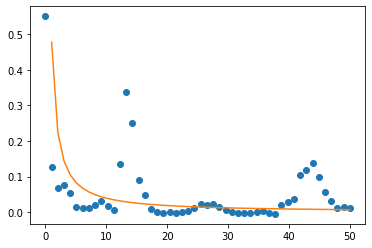

1.122946957
[ 0.41962    -0.92279184]



<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


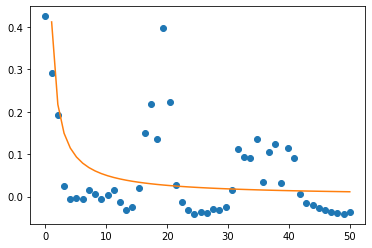

1.122946952
[ 0.47053057 -0.74691081]



<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-30-80d0e512f0e9>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


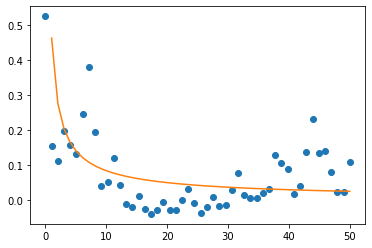

[-0.9524134537135511, -1.072712639092427, -2.832274055203296, -1.1573563356679313, -1.0967354002710659, -0.9227918410354322, -0.7469108112676363]


In [31]:
lags = 50
abs_ret, sq_ret, simple_ret, log_ret = abs_sq(ret_raw['ret'])
autocorr_t, pautocorr_t = autocorr_stats(sq_ret, lags)
fit_autocorr_func(autocorr_t[1:], lags, power_law)

beta = []

for key, elem in DataFrameDictSq.items():
    print(key)
    autocorr_l, pautocorr_l = autocorr_stats(elem, lags)
    beta.append(fit_autocorr_func(autocorr_l[1:], lags, power_law))
print(beta)

In [13]:
beta = np.array(beta)

def stats_all(data):
    mu = data.mean()
    stdev = data.std()
    max = data.max()
    min = data.min()
    print('Mean: ' + str(mu) + '\n')
    print('Std: ' + str(stdev) + '\n')
    print('Min: ' + str(min) + '\n')
    print('Max: ' + str(max) + '\n')
    print('N.Obs: ' + str(len(data)) + '\n')

stats_all(beta)

Mean: -0.6243236808546241

Std: 0.3052493637907328

Min: -1.9754829066671529

Max: -0.16446207243380342

N.Obs: 71



Include estimating the tail index: https://www.bankofcanada.ca/wp-content/uploads/2019/08/swp2019-28.pdf
https://doi.org/10.1214/aos/1176346318


Ljung-Box test from https://www.kaggle.com/code/nholloway/volatility-clustering-and-garch
Not sure if it works

In [44]:
from statsmodels.stats.diagnostic import acorr_ljungbox


ljung_res = acorr_ljungbox(log_ret, lags= 50, boxpierce=True)
print(ljung_res)

        lb_stat  lb_pvalue      bp_stat  bp_pvalue
1   2006.242176        0.0  2005.767850        0.0
2   2105.345214        0.0  2104.839647        0.0
3   2118.425562        0.0  2117.914841        0.0
4   2129.716777        0.0  2129.200717        0.0
5   2131.344850        0.0  2130.827892        0.0
6   2138.472795        0.0  2137.951343        0.0
7   2139.666777        0.0  2139.144478        0.0
8   2141.504718        0.0  2140.980970        0.0
9   2141.781506        0.0  2141.257518        0.0
10  2143.034345        0.0  2142.509173        0.0
11  2147.555057        0.0  2147.025253        0.0
12  2148.162885        0.0  2147.632411        0.0
13  2148.167691        0.0  2147.637210        0.0
14  2151.985803        0.0  2151.450508        0.0
15  2155.046872        0.0  2154.507477        0.0
16  2156.510421        0.0  2155.968950        0.0
17  2158.750937        0.0  2158.206111        0.0
18  2159.978994        0.0  2159.432232        0.0
19  2160.210418        0.0  215

#### Long-term memory:

Hurst exponent with 20 lags: 0.0003
Hurst exponent with 100 lags: 0.0013
Hurst exponent with 300 lags: 0.0033
Hurst exponent with 500 lags: 0.0046
Hurst exponent with 1000 lags: 0.0066


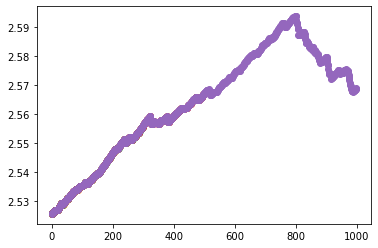

In [7]:
#import yfinance as yf
# rescaled range (R/S) analysis
def get_hurst_exponent(time_series, max_lag=20):
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return tau, reg[0]

for lag in [20, 100, 300, 500, 1000]:
    tau, hurst_exp = get_hurst_exponent(ret_log, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")
    plt.plot(np.linspace(0, len(tau), len(tau)), tau, 'o', label='Data')


In [9]:
ret_log.size

12687

In [32]:
from scipy.stats import linregress

def hurst(p, l):
    if isinstance(l, int):
        lags = [1, l]
    else:
        lags = l
    assert lags[-1] >=2,
    print(f"Price lags of {lags[1:]} are included")
    lp = np.log(p)
    var = [np.var(lp[l:] - lp[:-l]) for l in lags]
    hr = linregress(np.log(lags), np.log(var))[0] / 2
    return hr

hurst(np.array(np.abs(ret_raw['ret'])), range(2,100))
hurst(np.array(np.abs(ret_log)), range(2,100))

Price lags of range(3, 100) are included
Price lags of range(3, 100) are included


<ipython-input-32-b8f0eec28795>:17: RuntimeWarning: divide by zero encountered in log
  lp = np.log(p)
<ipython-input-32-b8f0eec28795>:18: RuntimeWarning: invalid value encountered in subtract
  var = [np.var(lp[l:] - lp[:-l]) for l in lags]
/home/karolina/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


nan

In [11]:

Min = 8
Max = 2
fluc = np.full(10, np.nan)
scale = np.full(10, np.nan)
slope = np.nan


def ss(series, period):
    PI = 2.0 * np.arcsin(1.0)
    SQRT2 = np.sqrt(2.0)
    _lambda = PI * SQRT2 / period
    a1 = np.exp(-_lambda)
    coeff2 = 2.0 * a1 * np.cos(_lambda)
    coeff3 = - np.power(a1, 2.0)
    coeff1 = 1.0 - coeff2 - coeff3
    filt1 = np.zeros_like(series)
    
    for i in range(2, len(series)):
        filt1[i] = coeff1 * (series[i] + (series[i - 1] if i - 1 >= 0 else 0)) * 0.5 + coeff2 * filt1[i - 1] + coeff3 * filt1[i - 2]

    return filt1

# (d) - Calculations
def RMS(N1, N, csum):
    seq = np.arange(1, N + 1)
    y = csum[N1 : N1 + N]
    sdx = np.std(seq) * np.sqrt(N / (N - 1))
    sdy = np.std(y) * np.sqrt(N / (N - 1))
    cov = np.cov(seq, y, bias=True)[0, 1] * (N / (N - 1))
    r2 = np.power(cov / (sdx * sdy), 2)
    rms = np.sqrt(1 - r2) * sdy
    return rms

def Arms(bar, csum, barsize):
    num = np.floor(barsize / bar).astype(int)
    sumr = sum(RMS(i * bar, bar, csum) for i in range(num))
    avg = np.log10(sumr / num)
    return avg

def fs(x, barsize, Min, Max):
    return np.round(Min * np.power(np.power(barsize / (Max * Min), 0.1111111111), x)).astype(int)

def hurst_exponent(close, barsize=100, slen=18, Min=8, Max=2):
    # Calculate Log Return
    r = np.log(close / np.roll(close, 1))
    # Mean of Log Return
    mean = np.convolve(r, np.ones(barsize) / barsize, mode="valid")
    mean = np.pad(mean, (barsize - 1, 0), 'constant', constant_values=0)

    # Calculate Cumulative Sum
    csum = np.cumsum(r - mean)

    # Set Ten Points of Root Mean Square Average along the Y log axis
    fluc = np.array([Arms(fs(i, barsize, Min, Max), csum, barsize) for i in range(10)])

    # Set Ten Points of data scale along the X log axis
    scale = np.array([np.log10(fs(i, barsize, Min, Max)) for i in range(10)])

        # Calculate Slope Measured From RMS and Scale on Log log plot using linear regression
    slopes = np.array([np.cov(scale, fluc, bias=True)[0, 1] / np.var(scale, ddof=0) for i in range(len(close) - barsize + 1)])

    # Calculate Moving Average Smoothed Hurst Exponent
    smooth = ss(slopes, slen)

    # Calculate Critical Value based on Confidence Interval (95% Confidence)
    ci = 1.645 * (0.3912 / np.power(barsize, 0.3))
    # Calculate Expected Value plus Critical Value
    cu = 0.5 + ci
    cd = 0.5 - ci

    return slopes, smooth, cu, cd


def plot_hurst_exponent(close, barsize=100, slen=18, Min=8, Max=2):
    slopes, smooth, cu, cd = hurst_exponent(close, barsize, slen, Min, Max)

    # Color of HE
    c = "green" if slopes[-1] > cu else "blue" if slopes[-1] >= 0.5 else "red" if slopes[-1] < cd else "orange" if slopes[-1] < 0.5 else "black"

    # Text of Table
    text = "Significant Trend" if slopes[-1] > cu else "Trend" if slopes[-1] >= 0.5 else "Significant Mean Reversion" if slopes[-1] < cd else "Mean Reversion" if slopes[-1] < 0.5 else "N/A"

    
    print(f"Hurst Exponent: {slopes[-1]:.3f}")
    print(f"Smoothed Hurst Exponent: {smooth[-1]:.3f}")
    



data = np.abs(ret_log)

plot_hurst_exponent(data.values)

<ipython-input-11-960e574428ca>:46: RuntimeWarning: divide by zero encountered in true_divide
  r = np.log(close / np.roll(close, 1))
<ipython-input-11-960e574428ca>:46: RuntimeWarning: divide by zero encountered in log
  r = np.log(close / np.roll(close, 1))
<ipython-input-11-960e574428ca>:52: RuntimeWarning: invalid value encountered in subtract
  csum = np.cumsum(r - mean)


Hurst Exponent: 0.020
Smoothed Hurst Exponent: 0.020


In [3]:

def dfa(x, nvals):
    # Compute the profile y(i) for i=1,2,...,N
    y = np.cumsum(x - np.mean(x))
    
    # Compute the integrated signal F(i) for i=1,2,...,N
    F = np.zeros_like(y)
    for i, n in enumerate(nvals):
        # Divide y into segments of length n
        nseg = len(y) // n
        y_reshaped = y[:nseg * n].reshape(nseg, n)
        
        # Compute the local trend for each segment using a polynomial fit
        local_trend = np.zeros_like(y_reshaped)
        for j in range(nseg):
            p = np.polyfit(np.arange(n), y_reshaped[j], 1)
            local_trend[j] = np.polyval(p, np.arange(n))
        
        # Compute the fluctuations around the local trend for each segment
        fluctuations = y_reshaped - local_trend
        
        # Compute the root mean square fluctuation for the entire signal
        F[i] = np.sqrt(np.mean(fluctuations**2))
    
    # Fit a straight line to the log-log plot of F(n) vs n
    p = np.polyfit(np.log(nvals), np.log(F), 1)
    
    # The Hurst exponent is the slope of the line
    return p[0]

# Generate a synthetic fractional Brownian motion time series with Hurst exponent H=0.6
n = 1000
H = 0.6
x = np.cumsum(np.random.normal(scale=np.sqrt(2 * H), size=n))
x -= np.arange(n) * x[-1] / float(n)

# Compute the Hurst exponent using DFA
nvals = 2**np.arange(4, 11)
H_dfa = dfa(x, nvals)

# Plot the results
fig, ax = plt.subplots()
ax.plot(np.log(nvals), np.log(dfa(x, nvals)), 'o', label='DFA')
ax.plot(np.log(nvals), np.polyval(np.polyfit(np.log(nvals), np.log(dfa(x, nvals)), 1), np.log(nvals)), label='Linear fit')
ax.legend()
ax.set_xlabel('log(n)')
ax.set_ylabel('log(F(n))')
plt.show()

print('Hurst exponent (DFA): {:.2f}'.format(H_dfa))

/home/karolina/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karolina/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-3-86f6ca8fa5fb>:25: RuntimeWarning: divide by zero encountered in log
  p = np.polyfit(np.log(nvals), np.log(F), 1)


TypeError: expected x and y to have same length